In [1]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappush, heappop

In [2]:
def printColouredText(text, foregroundColor = (0, 0, 0), backgroundColor = (255, 255, 255)):
    return "\033[48;2;{};{};{}m\033[38;2;{};{};{}m{}\033[38;2;0;0;0m\033[48;2;255;255;255m".format(backgroundColor[0], backgroundColor[1], backgroundColor[2], foregroundColor[0], foregroundColor[1], foregroundColor[2], text)

#Funcion hash para mapear de una coordenada (x, y) de una malla de puntos equidistantes a un numero natural
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAlto, numeroVerticesAncho):
    return valorCoordenadaX + valorCoordenadaY * numeroVerticesAlto

#Funcion hash para mapear de un numero natural a una coordenada (x, y) de una malla de puntos equidistantes
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAlto, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def extraerInformacionGrafo(nombreArchivo):
    grafo = {}
    informacionAristasGrafo = {}
    numeroVerticesAlto = None
    numeroVerticesAncho = None
    
    #Lectura linea por linea del archivo, en la primera linea se tiene el numero de vertices de alto del grafo de malla, en la segunda linea se tiene el numero de vertices de ancho del grafo de malla, en las demas lineas se tienen separados por espacios los datos de cada arista (Nodo origen, nodo destino, costo y color asignado)
    inputStream = open(nombreArchivo, "r")
    listaNodosEncontrados = []
    lineasTextoArchivo = inputStream.readlines()
    for indice in range(len(lineasTextoArchivo)):
        if indice == 0:
            numeroVerticesAlto = int(lineasTextoArchivo[indice].strip())
        elif indice == 1:
            numeroVerticesAncho = int(lineasTextoArchivo[indice].strip())
        else:
            datosArista = lineasTextoArchivo[indice].strip().split(" ")
            nodoOrigen = int(datosArista[0])
            nodoDestino = int(datosArista[1])
            costo = float(datosArista[2])
            colorArista = datosArista[3]
            crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
            informacionAristasGrafo[(nodoOrigen, nodoDestino)] = {"costo": costo, "color": colorArista}

            if nodoOrigen not in listaNodosEncontrados:
                listaNodosEncontrados.append(nodoOrigen)
            if nodoDestino not in listaNodosEncontrados:
                listaNodosEncontrados.append(nodoDestino)
    numeroNodosEncontrados = len(listaNodosEncontrados)
    numeroAristasEncontradas = len(list(informacionAristasGrafo.keys()))
    inputStream.close()
    return grafo, informacionAristasGrafo, numeroNodosEncontrados, numeroAristasEncontradas, numeroVerticesAlto, numeroVerticesAncho

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient
            break

def fix_minheap(heap, i):
    if i == 0: return
    p = int(i/2) #parent
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)

def Dijkstra(G, start):
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + G[u][v]
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D,P

# From  http://www.ics.uci.edu/~eppstein/161/python/dijkstra.py
# David Eppstein, UC Irvine, 4 April 2002
def shortestPath(G,start,end):
    """
    Find a single shortest path from the given start vertex to the given end vertex.
    The input has the same conventions as Dijkstra().
    The output is a list of the vertices in order along the shortest path.
     """

    D,P = Dijkstra(G,start)
    Path = []
    while 1:
        Path.append(end)
        if end == start: break
        end = P[end]
    Path.reverse()
    return Path

def obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    listaNodosVisitadosGrafo = []
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoOrigen)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
            if nodoDestino not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoDestino)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo):
    transparencia = 0.9
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                colorArista = informacionAristasGrafo[(nodoOrigen, nodoDestino)]["color"]
                plt.plot([valorCoordenadaXNodoOrigen, valorCoordenadaXNodoDestino], [valorCoordenadaYNodoOrigen, valorCoordenadaYNodoDestino], '', c = colorArista, alpha = transparencia)

In [3]:
#Parametros de ejecucion del programa
nombreArchivo = "Graph Data.txt"
coordenadaXPuntoInicial = 1
coordenadaYPuntoInicial = 2
coordenadaXPuntoFinal = 23
coordenadaYPuntoFinal = 22

In [4]:
grafo, informacionAristasGrafo, numeroNodosEncontrados, numeroAristasEncontradas, numeroVerticesAlto, numeroVerticesAncho = extraerInformacionGrafo(nombreArchivo)

colorTextoVerde = (35, 155, 86)
colorTextoRojo = (176, 58, 46)
print("Se ha extraído la información del grafo del archivo", printColouredText(nombreArchivo, colorTextoVerde))
print("El grafo contiene", printColouredText(str(numeroNodosEncontrados) + " nodos", colorTextoVerde), "y", printColouredText(str(numeroAristasEncontradas) + " aristas", colorTextoVerde))
print("Se va a buscar una solución al camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoRojo), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoRojo))

Se ha extraído la información del grafo del archivo Graph Data.txt
El grafo contiene 625 nodos y 1200 aristas
Se va a buscar una solución al camino más corto entre los puntos (1, 2) y (23, 22)


In [5]:
nodoOrigen = hashCoordenadaANumero(coordenadaXPuntoInicial, coordenadaYPuntoInicial, numeroVerticesAlto, numeroVerticesAncho)
nodoDestino = hashCoordenadaANumero(coordenadaXPuntoFinal, coordenadaYPuntoFinal, numeroVerticesAlto, numeroVerticesAncho)

print(nodoOrigen)
print(nodoDestino)

#print(Dijkstra(grafo, nodoOrigen))
#print("")

listaNodosCaminoMasCortoOrigenADestino = shortestPath(grafo, nodoOrigen, nodoDestino)
coordX = []
coordY = []
for nodo in listaNodosCaminoMasCortoOrigenADestino:
    cx, cy = hashNumeroACoordenada(nodo, numeroVerticesAlto, numeroVerticesAncho)
    coordX.append(cx)
    coordY.append(cy)

51
573


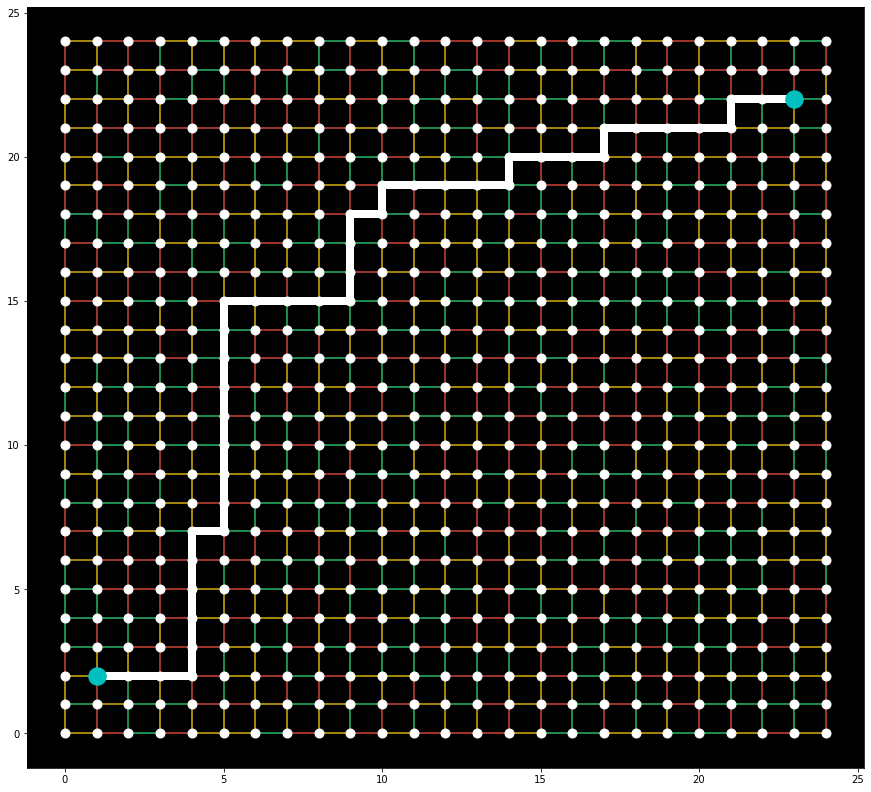

In [6]:
listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho)

plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (15, 14))
dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.plot(coordX, coordY, 'w-', linewidth = 8)
plt.plot([coordenadaXPuntoInicial, coordenadaXPuntoFinal], [coordenadaYPuntoInicial, coordenadaYPuntoFinal], 'c.', markersize = 35)
plt.show()